<div id="container" style="position:relative;">
<div style="position:center; float:left"><h1>04.1 - CryptoPunk Price Prediction<br>Compiling Data on Recent and Upcoming Sales </h1></div>
<div style="position:relative; float:right"> 

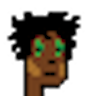
</div>

<hr> </hr>
Madelyn Goodman <br>
Brainstation Winter 2022 Capstone <br>
April 4, 2022

# Introduction

When evaluating my neural network and random forest regressor, I wanted to test these models on data of recent and upcoming CryptoPunk sales. 

I compiled data from these more recent transactions on March 31, 2022.

<hr>

In [4]:
#importing packages
import numpy as np
import pandas as pd

#installing and importing joblib
!pip install joblib
import joblib

from sklearn.metrics import r2_score

# Cleaning training data

In [5]:
#reading in the data
cp_sales = pd.read_csv('Data/punk_sales_data.csv')

In [ ]:
#looking at the data
pd.set_option('display.max_columns', None)
cp_sales.head()

,Unnamed: 0,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,1,Sold,2017-06-23,larvalabs,0.00,544,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.347835,1,0,0.00
2,2,Sold,2017-06-23,larvalabs,0.25,1841,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.566622,1,0,0.25
3,3,Sold,2017-06-23,larvalabs,0.00,3134,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.324392,1,0,0.00
4,4,Sold,2017-06-23,larvalabs,0.06,4025,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.321051,1,0,0.06


In [6]:
#dropping the first duplicated index
cp_sales.drop('Unnamed: 0', axis=1, inplace=True)
cp_sales.head()

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,...,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.0,0,0.0,...,0,0,0,1,0,0,0.461207,1,0,0.98
1,Sold,2017-06-23,larvalabs,0.00,544,326.99,0,0.0,0,0.0,...,0,0,0,0,1,0,0.347835,1,0,0.00
2,Sold,2017-06-23,larvalabs,0.25,1841,326.99,0,0.0,0,0.0,...,0,0,0,1,0,0,0.566622,1,0,0.25
3,Sold,2017-06-23,larvalabs,0.00,3134,326.99,0,0.0,0,0.0,...,0,0,0,0,1,0,0.324392,1,0,0.00
4,Sold,2017-06-23,larvalabs,0.06,4025,326.99,0,0.0,0,0.0,...,0,0,0,0,1,0,0.321051,1,0,0.06


In [ ]:
#checking null values
cp_sales.isna().sum().sum()

0

In [ ]:
#cehcking for duplicated rows
cp_sales.duplicated().sum().sum()

0

In [7]:
#defining variables not necessary for model building
todrop_model = ['txn_type', 'date', 'source', 'opensea', 'larvalabs', 'price_delta']

In [8]:
#dropping variables from the dataset
cp_sales_model = cp_sales.drop(todrop_model, axis=1)
cp_sales_model.head()

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,...,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,0.98,0,326.99,0,0.0,0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.461207
1,0.00,544,326.99,0,0.0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.347835
2,0.25,1841,326.99,0,0.0,0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.566622
3,0.00,3134,326.99,0,0.0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.324392
4,0.06,4025,326.99,0,0.0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.321051


<hr>

To expidite the data compilation process, I defined a function that would concatonate all the punk data I already had - previous sale data and the meta-data associated with each punk. 
<hr>

In [9]:
#defining a function to create a test dataframe 

def meta_recent(punk, recent):

    '''
    This function takes a dataframe of data from recent and upcoming CryptoPunk sales and concatonates it with 
    the meta data of each punk - its attributes, type, and rarity - and appends that with the data on all previous 
    sales found in the test data.

    Parameters
    -------------------------------------
    punk: Punk ID of the punk with the recent or upcoming sale
    recent: The compiled dataframe of new data on punk transactions

    Return
    -------------------------------------
    This function returns a dataframe of complete data on punk transactions up until March 31, 2022

    Note on assumptions
    -------------------------------------
    the meta-data of the punk was taken from the last sale within the test/train dataframe. This means 
    that the whale status of the buyer and seller for the recent and upcoming sales were assumed to be the 
    same as the last sale in the dataframe. This is a limitation on the accuracy with which the models will be 
    able to predict price. 

    '''
    
    #setting columns to drop to create meta dataframe
    todrop_meta = ['eth', 'close', 'bid_count', 'mean_bid', 'num_prev_sales', 'prev_price', 
               'days_since_claim']
    
    #creating the metadata dataframe
    meta_punk = cp_sales_model[cp_sales_model['punk_id']==punk]
    meta_punk.drop(todrop_meta, inplace=True, axis=1)
    meta_punk = meta_punk.tail(1)
    
    #concatonating the metadata and the new data
    recent.reset_index(inplace=True, drop=True)
    meta_punk.reset_index(inplace=True, drop=True)
    test= pd.merge(recent, meta_punk, how='outer', on='punk_id')
    
    #appending dataframes with historic data   
    hist_punk = cp_sales_model[cp_sales_model['punk_id']==punk]
    new_punk = pd.concat([test, hist_punk], axis=0)
    
    return new_punk


# Compiling recent data

The following punks had recent sales:
- 2723
- 531
- 8718
- 1057
- 3828

<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 5829</h2></div>
<div style="position:relative; float:right"> 

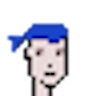
</div>

In [ ]:
#looking at the data in the current dataset for punk 5829
cp_sales_model[cp_sales_model['punk_id']==5829]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
7559,6.10,5829,752.86,2,2.71,0,0.00,1286,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
8129,10.00,5829,1513.67,3,3.84,1,6.10,1320,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
8757,12.99,5829,1779.62,4,5.38,2,10.00,1333,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
15724,33.99,5829,2555.43,5,6.90,3,12.99,1500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
15725,31.99,5829,2555.43,6,11.42,4,33.99,1500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
15964,36.99,5829,2508.31,7,14.36,5,31.99,1502,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379


In [ ]:
#creating a dataframe of the new data
recent_5829 =pd.DataFrame({'punk_id':[5829],
             'eth':[73],
             'close':[3385.16],
             'bid_count': [0],
             'mean_bid':[0],
             'num_prev_sales':[6],
             'days_since_claim':[1741],
             'prev_price':[36.99]})

In [ ]:
#looking at the dataframe resulting from the function
meta_recent(5829, recent_5829)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,5829,73.00,3385.16,0,0.00,6,1741,36.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
7559,5829,6.10,752.86,2,2.71,0,1286,0.00,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
8129,5829,10.00,1513.67,3,3.84,1,1320,6.10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
8757,5829,12.99,1779.62,4,5.38,2,1333,10.00,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
15724,5829,33.99,2555.43,5,6.90,3,1500,12.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
15725,5829,31.99,2555.43,6,11.42,4,1500,33.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
15964,5829,36.99,2508.31,7,14.36,5,1502,31.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379


In [ ]:
#saving the dataframe of all recent punk data to be used in evaluating models
recent_5829_df = meta_recent(5829, recent_5829)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 8565</h2></div>
<div style="position:relative; float:right"> 

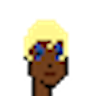
</div>



In [ ]:
#looking at the data in the current dataset for punk 8565
cp_sales_model[cp_sales_model['punk_id']==8565]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
13147,25.25,8565,3433.99,1,24.50,0,0.00,1410,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
13221,25.75,8565,3240.01,2,24.88,1,25.25,1411,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
15821,31.90,8565,2555.43,3,25.17,2,25.75,1500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
17366,79.00,8565,3323.12,4,26.85,3,31.90,1522,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255


In [ ]:
#creating a dataframe of the new data
recent_8565 =pd.DataFrame({'punk_id':[8565, 8565],
             'eth':[68, 70],
             'close':[3385.16, 3258.90],
             'bid_count': [1, 0],
             'mean_bid':[68, 0],
             'num_prev_sales':[4, 5],
             'days_since_claim':[1741, 1742],
             'prev_price':[79, 68]})

In [ ]:
#looking at the resulting dataframe from the function
meta_recent(8565, recent_8565)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,8565,68.00,3385.16,1,68.00,4,1741,79.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
1,8565,70.00,3258.90,0,0.00,5,1742,68.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
13147,8565,25.25,3433.99,1,24.50,0,1410,0.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
13221,8565,25.75,3240.01,2,24.88,1,1411,25.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
15821,8565,31.90,2555.43,3,25.17,2,1500,25.75,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255
17366,8565,79.00,3323.12,4,26.85,3,1522,31.90,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255


In [ ]:
#saving the updated data on the punk into a dataframe to pass through the models
recent_8565_df = meta_recent(8565, recent_8565)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 6161</h2></div>
<div style="position:relative; float:right">

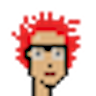
</div>


In [ ]:
#looking at the data in the current dataset for punk 6161
cp_sales_model[cp_sales_model['punk_id']==6161]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
12691,24.0,6161,2399.99,0,0.0,0,0.0,1399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405
16246,60.0,6161,2829.35,1,22.0,1,24.0,1504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405
16468,60.0,6161,2892.98,2,41.0,2,60.0,1505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405


In [ ]:
#creating a dataframe of the new data
recent_6161 =pd.DataFrame({'punk_id':[6161],
             'eth':[67.5],
             'close':[3258.9],
             'bid_count': [2],
             'mean_bid':[67.5],
             'num_prev_sales':[3],
             'days_since_claim':[1742],
             'prev_price':[60]})

In [ ]:
#looking at the dataframe resulting from the function
meta_recent(6161, recent_6161)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,6161,67.5,3258.90,2,67.5,3,1742,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405
12691,6161,24.0,2399.99,0,0.0,0,1399,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405
16246,6161,60.0,2829.35,1,22.0,1,1504,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405
16468,6161,60.0,2892.98,2,41.0,2,1505,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.589405


In [ ]:
#saving the results of the function in a dataframe to pass through the models
recent_6161_df = meta_recent(6161, recent_6161)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 5570</h2></div>
<div style="position:relative; float:right">

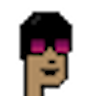
</div>


In [ ]:
#looking at the data in the current dataset for punk 5570
cp_sales_model[cp_sales_model['punk_id']==5570]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
3066,0.25,5570,162.49,0,0.0,0,0.0,852,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911


In [ ]:
#creating a dataframe of the new data
recent_5570 =pd.DataFrame({'punk_id':[5570],
             'eth':[71],
             'close':[3258.9],
             'bid_count': [1],
             'mean_bid':[70],
             'num_prev_sales':[1],
             'days_since_claim':[1742],
             'prev_price':[0.25]})

In [ ]:
#looking at the results of the function
meta_recent(5570, recent_5570)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,5570,71.00,3258.90,1,70.0,1,1742,0.25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911
3066,5570,0.25,162.49,0,0.0,0,852,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911


In [ ]:
#saving the results of the function in a dataframe to pass through the models
recent_5570_df = meta_recent(5570, recent_5570)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 2582</h2></div>
<div style="position:relative; float:right"> 

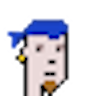
</div>

In [ ]:
#looking at the data in the current dataset for punk 2582
cp_sales_model[cp_sales_model['punk_id']==2582]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
4633,1.00,2582,438.83,1,1.0,0,0.0,1148,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
12302,24.95,2582,2299.92,2,1.0,1,1.0,1390,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336


In [ ]:
#creating a dataframe of the new data
recent_2582 =pd.DataFrame({'punk_id':[2582],
             'eth':[73.90],
             'close':[3385.16],
             'bid_count': [0],
             'mean_bid':[0],
             'num_prev_sales':[2],
             'days_since_claim':[1741],
             'prev_price':[24.95]})

In [ ]:
#looking at the results of the function
meta_recent(2582, recent_2582)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,2582,73.90,3385.16,0,0.0,2,1741,24.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
4633,2582,1.00,438.83,1,1.0,0,1148,0.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
12302,2582,24.95,2299.92,2,1.0,1,1390,1.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336


In [ ]:
#saving the results of the function as a dataframe to pass through the models
recent_2582_df = meta_recent(2582, recent_2582)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Concatonating recent sale data

<hr>

I created one dataframe of all the punks with their updated data to pass through the models together for greater efficiency of testing the models.
<hr>

In [ ]:
#concatonating recent sales data for all punks
recent_sales = pd.concat([recent_2582_df, recent_5570_df, recent_5829_df, recent_6161_df, recent_8565_df], 
                         ignore_index=True, axis=0)

recent_sales

,punk_id,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,2582,73.90,3385.16,0,0.00,2,1741,24.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
1,2582,1.00,438.83,1,1.00,0,1148,0.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
2,2582,24.95,2299.92,2,1.00,1,1390,1.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
3,5570,71.00,3258.90,1,70.00,1,1742,0.25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911
4,5570,0.25,162.49,0,0.00,0,852,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911
5,5829,73.00,3385.16,0,0.00,6,1741,36.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
6,5829,6.10,752.86,2,2.71,0,1286,0.00,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
7,5829,10.00,1513.67,3,3.84,1,1320,6.10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
8,5829,12.99,1779.62,4,5.38,2,1333,10.00,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379
9,5829,33.99,2555.43,5,6.90,3,1500,12.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.577379


In [ ]:
#saving recent sales data to a csv

recent_sales.to_csv('generated_files/recent_sales_test.csv')

# Testing models on recent sale data

## Instantiating scaler exactly as it was for the training data

<hr>

To prevent data leakage, I brought in the training dataset to reinstantiate the scaler in order to use scaled data with the neural network. Since I set the same random states throughout all of my notebooks, this scaler was the same as it was during model construction. 
<hr>

In [ ]:
#loading training data

cp_sales = pd.read_csv('Data/punk_sales_data.csv')

#dropping unamed column
cp_sales.drop('Unnamed: 0', inplace=True, axis=1)

#defining variables to drop that won't work in the model
todrop_model = ['txn_type', 'date', 'source', 'punk_id', 'larvalabs', 'opensea', 'price_delta']

#dropping variables
cp_sales_model = cp_sales.drop(todrop_model, axis=1)


In [ ]:
#prepping data to instatiate the scaler
#splitting feature and target
X = cp_sales_model.drop('eth', axis=1)
y = cp_sales_model['eth']
print(X.shape)
print(y.shape)

#testing and validtion split  
from sklearn.model_selection import train_test_split

#test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=789)
#validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=789)

#scaling 
from sklearn.preprocessing import StandardScaler
cp_scaler = StandardScaler()
cp_scaler.fit(X_train)

X_train_s = cp_scaler.transform(X_train)
X_validation_s = cp_scaler.transform(X_validation)
X_test_s = cp_scaler.transform(X_test)

(18943, 101)
(18943,)


## Prepping recent sales data for modeling

In [ ]:
#dropping punk_id

recent_sales.drop('punk_id', axis=1, inplace=True)
recent_sales.head()

,eth,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,73.90,3385.16,0,0.0,2,1741,24.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
1,1.00,438.83,1,1.0,0,1148,0.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
2,24.95,2299.92,2,1.0,1,1390,1.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.244336
3,71.00,3258.90,1,70.0,1,1742,0.25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911
4,0.25,162.49,0,0.0,0,852,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.316911


In [ ]:
#prepping data
#splitting feature and target
X = recent_sales.drop('eth', axis=1)
y = recent_sales['eth']
print(X.shape)
print(y.shape)

#scaling with the training scaler
X_s = cp_scaler.transform(X)

(22, 101)
(22,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## Testing Neural Network

<hr>

In notebook 03-CryptoPunk Price Prediction Model Construction I saved my final neural network and random forest regressor models as pickle files. This allowed me to load these into this notebook to use the same models. 
<hr>

In [ ]:
#loading the model

NN_model = joblib.load(open('generated_files/Neural_Network_13.pkl' ,'rb'))

In [ ]:
#generating predictions
y_pred_NN = NN_model.predict(X_s)

#scoring the model
r2_score(y, y_pred_NN)

-171.46632827982498

<hr>

This model predicted the data with much lower accuracy than a horizontal line would have with an R2 of -171.47. Hypoteses as to why follow in the notebook.
<hr>

In [ ]:
#viewing the predicted prices
y_pred_NN

array([[487.3153 ],
       [145.23154],
       [304.22873],
       [491.24448],
       [ 64.30483],
       [501.8782 ],
       [207.25577],
       [222.89027],
       [269.32236],
       [369.49948],
       [376.9722 ],
       [379.32278],
       [568.1334 ],
       [344.96893],
       [418.06726],
       [435.9065 ],
       [519.27704],
       [508.64868],
       [333.43604],
       [343.28677],
       [371.97937],
       [406.33273]], dtype=float32)

<hr>

These predicted prices are much higher than makes sense given the input data.
<hr>

## Testing RF Model

In [ ]:
#loading random forest

RF_model = joblib.load(open('generated_files/RandomForest_model.pkl' ,'rb'))

In [ ]:
#generating predictions using the model
y_pred_RF = RF_model.predict(X)

#scoring the model
r2_score(y, y_pred_RF)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


-123.98271767863008

<hr>

The random forest regressor essentialily performed just as poorly on the recent sales data as the neural network did. 
<hr>

In [ ]:
y_pred_RF

array([335.37338948, 284.74445471, 301.74445471, 344.40000704,
       283.64721301, 335.37338948, 286.50875751, 291.51517912,
       330.29577744, 351.77046243, 356.74499759, 365.47123185,
       369.90299991, 301.37338948, 317.33283094, 359.34408841,
       369.00234658, 335.37338948, 320.62960407, 320.84746285,
       356.12979619, 356.86665645])

<hr>

Much like the neural network, this model made predictions that were much higher than made sense given the input data.
<hr>

# Conclusions

Since these models are time-series regressors, they were not equipped to necessarily handle the extrapolation in time that these future sales represent. I had thought that the "days since claimed" feature would be able to capture the effect of time in the model, which it did when fitting the model with the test and train data, however, it appeared that the much higher days since claimed values in this future data biased the predictions to be much higher than made sense. This revealed a large limitation in the applicability of this model for future predictions fo sales prices.

If I had more time, I would have used the insights from this analysis to refit my data using time-series models or removing the days since claimed feature to create models that were better equipped to extrapolate to future sales. 
<hr>

# Data Dictionary

* `txn_type`: In the final dataset, this feature is all "Sold." This was kept to ensure that only data on sales was being used in the analysis. This feature was always removed when building and running models. 
* `date`: The date of the sale. This feature was used during EDA but was removed for model building and running. 
* `source`: This specifies the source of the transaction data. This data was compiled from sales through Larva Labs, the creators of CryptoPunks, and Opensea, one of the largest NFT trading platforms. 
* `eth`: The price the CryptoPunk sold for in Ether, the native cryptocurrency to the Ethereum blockchain. 
* `punk_id`: The unique ID of a CryptoPunk denotes the order it was minted in.
* `close`: The closing price of ETH in USD for the date of the sale. 
* `bid_count`: The number of bids made on the punk prior to the final sale.
* `mean_bid`: The average of the bids for the sale in ETH.
* `num_prev_sales`: The number of sales of the punk prior to that sale.
* `prev_price`: The price the punk sold for in ETH at the sale immediately prior. 
* `days_since_claim`: The number of days from the date CryptoPunks were first claimed (June 23, 2017) until the day of the sale.
* `whale_buy`: 1 if the buyer had made 100 or more purchases, 0 if the buyer had made fewer than 100 purchases.
* `whale_sell`: 1 if the seller had sold 100 or more times, 0 if the seller had sold for fewer than 100 times. 
* Traits vectors: Columns representing the unique traits found in CryptoPunks. 1 if the punk being sold has that trait, else 0.
* Types vectors: Columns representing the unique types of punks. 1 if the punk is that type, else 0.
* `punk_rarity`: A dervived variable to represent how common the traits and type of the punk is from 0-1, with a higher value denoting greater rarity. 
* Source vectors: `larvalabs` and `opensea` columns with 1 denoting the data on the sale came from that platform, else 0. 

# Upcoming sales data - Appendix

<hr>

This data did not end up being used as the models were not able to perform on the data of recent sales. Any prediction that the models would make on this data would be erroneous, therefore, it was not even attempted. 
<hr>

<hr>

Punks for sale: 

- 7672
- 3836
- 2821
- 4248
- 4711

`eth` was left out of these dataframes, as this data was intended to simply make predictions on price, not to attempt to evaluate models. Further, since these were upcoming sales, this data was not yet available.
<hr>

<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 7672</h2></div>
<div style="position:relative; float:right"> 

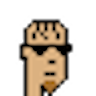
</div>


<hr>

I left out a "sale" on jan 4, 2022 because it was for E0. this indicates that it was basically just a transfer as someone offered 0 for it and it was sold to that address  for E0. This could be because someone was switching it between wallets or giving it to a friend outside of a transfer transaction. 
<hr>

In [ ]:
#looking at the data in the current dataset for punk 7672
cp_sales_model[cp_sales_model['punk_id']==7672]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
15193,0.0,7672,2463.9,0,0.0,0,0.0,1498,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307


In [10]:
#creating a dataframe of the new data
recent_7672 =pd.DataFrame({'punk_id':[7672, 7672, 7672],
             'close':[3769.70, 3336.63,3305.62],
             'bid_count': [0, 1,0],
             'mean_bid':[0, 70,0],
             'num_prev_sales':[3, 4,5],
             'days_since_claim':[1653, 1739,1746],
             'prev_price':[0, 66.45,71.45]})

In [11]:
#viewing the results from the function
meta_recent(7672, recent_7672)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,...,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,eth
0,7672,3769.70,0,0.0,3,1653,0.00,1,1,0,...,0,0,0,0,0,0,1,0,0.315307,NaN
1,7672,3336.63,1,70.0,4,1739,66.45,1,1,0,...,0,0,0,0,0,0,1,0,0.315307,NaN
2,7672,3305.62,0,0.0,5,1746,71.45,1,1,0,...,0,0,0,0,0,0,1,0,0.315307,NaN
15193,7672,2463.90,0,0.0,0,1498,0.00,1,1,0,...,0,0,0,0,0,0,1,0,0.315307,0.0


In [ ]:
#saving to dataframe
recent_7672_df = meta_recent(7672, recent_7672)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 3836</h2></div>
<div style="position:relative; float:right"> 

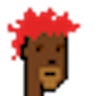
</div>

In [ ]:
#looking at the data in the current dataset for punk 3836
cp_sales_model[cp_sales_model['punk_id']==3836]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
10254,24.0,3836,1488.34,0,0.00,0,0.0,1348,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226
16417,55.0,3836,2892.98,1,24.00,1,24.0,1505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226
17930,152.0,3836,3247.99,1,5.50,2,55.0,1527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226
17931,122.0,3836,3247.99,2,78.75,3,152.0,1527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226


In [ ]:
#creating a dataframe of the new data
recent_3836 =pd.DataFrame({'punk_id':[3836, 3836, 3836],
             'close':[3083.10, 2455.94 ,3305.62],
             'bid_count': [0, 2, 2],
             'mean_bid':[0, 68.75, 65.82],
             'num_prev_sales':[4, 5, 6],
             'days_since_claim':[1662, 1677, 1746],
             'prev_price':[152, 60, 73.95]})

In [ ]:
#viewing the results of the function
meta_recent(3836, recent_3836)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,eth
0,3836,3083.10,0,0.00,4,1662,152.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,NaN
1,3836,2455.94,2,68.75,5,1677,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,NaN
2,3836,3305.62,2,65.82,6,1746,73.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,NaN
10254,3836,1488.34,0,0.00,0,1348,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,24.0
16417,3836,2892.98,1,24.00,1,1505,24.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,55.0
17930,3836,3247.99,1,5.50,2,1527,55.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,152.0
17931,3836,3247.99,2,78.75,3,1527,152.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,122.0


In [ ]:
#saving the results of the function to a dataframe
recent_3836_df = meta_recent(3836, recent_3836)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 4248</h2></div>
<div style="position:relative; float:right"> 

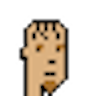
</div>


In [ ]:
#looking at the data in the current dataset for punk 4248
cp_sales_model[cp_sales_model['punk_id']==4248]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
9531,17.9,4248,1935.57,0,0.0,0,0.0,1339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954
9911,24.0,4248,1577.83,1,17.9,1,17.9,1341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954
10149,22.0,4248,1422.02,1,21.0,2,24.0,1346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954
14296,0.0,4248,2147.38,2,21.5,3,22.0,1477,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954


In [ ]:
#creating a dataframe of the new data
recent_4248 =pd.DataFrame({'punk_id':[4248, 4248],
             'close':[4445.10,3305.62],
             'bid_count': [3 , 1],
             'mean_bid':[65.65 , 63.63],
             'num_prev_sales':[ 4, 5],
             'days_since_claim':[ 1620, 1746],
             'prev_price':[0 , 82.95]})

In [ ]:
#viewing the results of the function
meta_recent(4248, recent_4248)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,eth
0,4248,4445.10,3,65.65,4,1620,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954,NaN
1,4248,3305.62,1,63.63,5,1746,82.95,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954,NaN
9531,4248,1935.57,0,0.00,0,1339,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954,17.9
9911,4248,1577.83,1,17.90,1,1341,17.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954,24.0
10149,4248,1422.02,1,21.00,2,1346,24.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954,22.0
14296,4248,2147.38,2,21.50,3,1477,22.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.332954,0.0


In [ ]:
#saving the results to a dataframe
recent_4248_df = meta_recent(4248, recent_4248)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 4711</h2></div>
<div style="position:relative; float:right"> 

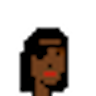
</div>


In [ ]:
#looking at the data in the current dataset for punk 4711
cp_sales_model[cp_sales_model['punk_id']==4711]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
13268,20.7,4711,3492.75,1,0.05,0,0.0,1413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.568935


In [ ]:
#creating a dataframe of the new data
recent_4711 =pd.DataFrame({'punk_id':[4711],
             'close':[3305.62],
             'bid_count': [1],
             'mean_bid':[64],
             'num_prev_sales':[1],
             'days_since_claim':[1746],
             'prev_price':[20.7]})

In [ ]:
#viewing the results of the function
meta_recent(4711, recent_4711)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,eth
0,4711,3305.62,1,64.00,1,1746,20.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.568935,NaN
13268,4711,3492.75,1,0.05,0,1413,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.568935,20.7


In [ ]:
#saving the results to a dataframe
recent_4711_df = meta_recent(4711, recent_4711)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div id="container" style="position:relative;">
<div style="position:center; float:left"><h2>Punk 6130</h2></div>
<div style="position:relative; float:right"> 

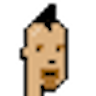
</div>


Assumptions: 
- the price of ethereum will be the price today
- the punk will sell on Monday (april 4, 2022)
- whale sell/buy will be the same as the last one in the dataset

In [ ]:
#looking at the data in the current dataset for punk 6130
cp_sales_model[cp_sales_model['punk_id']==6130]

,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
325,0.24,6130,269.20,0,0.00,0,0.00,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
5094,1.59,6130,377.28,1,0.24,1,0.24,1179,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
5572,2.00,6130,320.63,2,0.91,2,1.59,1188,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
6266,3.15,6130,357.55,3,1.28,3,2.00,1192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
6701,5.69,6130,359.90,4,1.74,4,3.15,1194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
10625,18.49,6130,1827.04,5,2.53,5,5.69,1357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
15735,34.25,6130,2555.43,1,15.00,6,18.49,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402
16695,50.00,6130,3142.09,2,12.50,7,34.25,1509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402


In [ ]:
#creating a dataframe of the new data
recent_6130 =pd.DataFrame({'punk_id':[6130,6130],
             'close':[3336.63, 3305.62],
             'bid_count': [0, 1],
             'mean_bid':[0, 65],
             'num_prev_sales':[8, 9],
             'days_since_claim':[1739, 1746],
             'prev_price':[50, 71]})

In [ ]:
#viewing the results of the function
meta_recent(6130, recent_6130)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,eth
0,6130,3336.63,0,0.00,8,1739,50.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,NaN
1,6130,3305.62,1,65.00,9,1746,71.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,NaN
325,6130,269.20,0,0.00,0,11,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,0.24
5094,6130,377.28,1,0.24,1,1179,0.24,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,1.59
5572,6130,320.63,2,0.91,2,1188,1.59,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,2.00
6266,6130,357.55,3,1.28,3,1192,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,3.15
6701,6130,359.90,4,1.74,4,1194,3.15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,5.69
10625,6130,1827.04,5,2.53,5,1357,5.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,18.49
15735,6130,2555.43,1,15.00,6,1500,18.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,34.25
16695,6130,3142.09,2,12.50,7,1509,34.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.335402,50.00


In [ ]:
#saving the results to a dataframe
recent_6130_df = meta_recent(6130, recent_6130)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Concatonating upcoming sale data

In [ ]:
#concatonating all the data on upcoming punk sales
upcoming_sales = pd.concat([recent_7672_df, recent_3836_df, recent_4248_df, recent_4711_df, recent_6130_df], 
                         ignore_index=True, axis=0)

upcoming_sales

,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,eth
0,7672,3769.70,0,0.00,3,1653,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307,NaN
1,7672,3336.63,1,70.00,4,1739,66.45,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307,NaN
2,7672,3305.62,0,0.00,5,1746,71.45,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307,NaN
3,7672,2463.90,0,0.00,0,1498,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307,0.00
4,3836,3083.10,0,0.00,4,1662,152.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,NaN
5,3836,2455.94,2,68.75,5,1677,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,NaN
6,3836,3305.62,2,65.82,6,1746,73.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,NaN
7,3836,1488.34,0,0.00,0,1348,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,24.00
8,3836,2892.98,1,24.00,1,1505,24.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,55.00
9,3836,3247.99,1,5.50,2,1527,55.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226,152.00


In [ ]:
#dropping eth with nan values for the recent data
upcoming_sales.drop('eth', axis=1, inplace=True)

In [ ]:
#viewing the data frame without eth
upcoming_sales.head()

,punk_id,close,bid_count,mean_bid,num_prev_sales,days_since_claim,prev_price,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,7672,3769.70,0,0.0,3,1653,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307
1,7672,3336.63,1,70.0,4,1739,66.45,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307
2,7672,3305.62,0,0.0,5,1746,71.45,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307
3,7672,2463.90,0,0.0,0,1498,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.315307
4,3836,3083.10,0,0.0,4,1662,152.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337226


In [ ]:
#saving to csv

recent_sales.to_csv('generated_files/upcoming_sales_test.csv')